The goal of this assignment is to implement your own logistic regression classifier with L2 regularization. You will do the following:

Extract features from Amazon product reviews.
Convert an dataframe into a NumPy array.
Write a function to compute the derivative of log likelihood function with an L2 penalty with respect to a single coefficient.
Implement gradient ascent with an L2 penalty.
Empirically explore how the L2 penalty can ameliorate overfitting.

In [89]:
import numpy as np
import pandas as pd
from sklearn import linear_model 

products = pd.read_csv('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week2/amazon_baby_subset.csv')  

## Load review dataset

For this assignment, we will use a subset of the Amazon product review dataset. The subset was chosen to contain similar numbers of positive and negative reviews, as the original dataset consisted primarily of positive reviews.

Load the dataset into a data frame named products. One column of this dataset is sentiment, corresponding to the class label with +1 indicating a review with positive sentiment and -1 for negative sentiment.

Let us quickly explore more of this dataset. The name column indicates the name of the product. Try listing the name of the first 10 products in the dataset.

After that, try counting the number of positive and negative reviews.

Note: For this assignment, we eliminated class imbalance by choosing a subset of the data with a similar number of positive and negative reviews.

In [90]:
print(products[0:10])
num_pos = sum(products['sentiment']==1)
num_neg = sum(products['sentiment']==-1)
print(num_pos)
print(num_neg)

                                                name  \
0  Stop Pacifier Sucking without tears with Thumb...   
1    Nature's Lullabies Second Year Sticker Calendar   
2    Nature's Lullabies Second Year Sticker Calendar   
3                        Lamaze Peekaboo, I Love You   
4  SoftPlay Peek-A-Boo Where's Elmo A Children's ...   
5                          Our Baby Girl Memory Book   
6  Hunnt&reg; Falling Flowers and Birds Kids Nurs...   
7  Blessed By Pope Benedict XVI Divine Mercy Full...   
8  Cloth Diaper Pins Stainless Steel Traditional ...   
9  Cloth Diaper Pins Stainless Steel Traditional ...   

                                              review  rating  sentiment  
0  All of my kids have cried non-stop when I trie...       5          1  
1  We wanted to get something to keep track of ou...       5          1  
2  My daughter had her 1st baby over a year ago. ...       5          1  
3  One of baby's first and favorite books, and it...       4          1  
4  Very cute 

## Apply text cleaning on the review data

In this section, we will perform some simple feature cleaning using data frames. The last assignment used all words in building bag-of-words features, but here we limit ourselves to 193 words (for simplicity). We compiled a list of 193 most frequent words into the JSON file named important_words.json. Load the words into a list important_words.

Let us perform 2 simple data transformations:

Remove punctuation
Compute word counts (only for important_words)
We start with the first item as follows:

If your tool supports it, fill n/a values in the review column with empty strings. The n/a values indicate empty reviews. For instance, Pandas's the fillna() method lets you replace all N/A's in the review columns as follows:

In [91]:
important_words = pd.read_json('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week2/important_words.json')
#print(important_words)
#type(important_words)   #df
#print(important_words[0])
#type(important_words[0])   #series
important_words = list(important_words[0])

In [92]:
products = products.fillna({'review':''})  # fill empty string to replace N/A's in 'review' column

Write a function remove_punctuation that takes a line of text and removes all punctuation from that text. The function should be analogous to the following Python code:

In [93]:
def remove_punctuation(text):
    import string
    return text.translate(str.maketrans('','',string.punctuation))    # nature's will change to natures

Apply the remove_punctuation function on every element of the review column and assign the result to the new column review_clean. Note. Many data frame packages support apply operation for this type of task. Consult appropriate manuals.

In [94]:
products['review_clean'] = products['review'].apply(remove_punctuation)  #Only series type can use apply funciton

Now we proceed with the second item. For each word in important_words, we compute a count for the number of times the word occurs in the review. We will store this count in a separate column (one for each word). The result of this feature processing is a single column for each word in important_words which keeps a count of the number of times the respective word occurs in the review text.

Note: There are several ways of doing this. One way is to create an anonymous function that counts the occurrence of a particular word and apply it to every element in the review_clean column. Repeat this step for every word in important_words. Your code should be analogous to the following:

In [95]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [96]:
important_words

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'hard',
 'plasti

The data frame products should contain one column for each of the 193 important_words. As an example, the column perfect contains a count of the number of times the word perfect occurs in each of the reviews.

Now, write some code to compute the number of product reviews that contain the word 'perfect'.

Hint:

First create a column called 'contains_perfect' which is set to 1 if the count of the word perfect (stored in column perfect is >= 1.
Sum the number of 1s in the column contains_perfect.

In [97]:
products['countains_perfect'] = products['perfect'].apply(lambda x : 1 if x >= 1 else 0)
#print(products['countains_perfect'])
sum(products['countains_perfect'])

2955

Quiz Question. How many reviews contain the word perfect?

Answer: 2955

## Train-Validation split

We split the data into a train-validation split with 80% of the data in the training set and 20% of the data in the validation set. We use seed=2 so that everyone gets the same result. Call the training and validation sets train_data and validation_data, respectively.

Note: In previous assignments, we have called this a train-test split. However, the portion of data that we don't train on will be used to help select model parameters (this is known as model selection). Thus, this portion of data should be called a validation set. Recall that examining performance of various potential models (i.e. models with different parameters) should be on validation set, while evaluation of the final selected model should always be on test data. Typically, we would also save a portion of the data (a real test set) to test our final model on or use cross-validation on the training set to select our final model. But for the learning purposes of this assignment, we won't do that.

In [98]:
import json
with open('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week2/module-4-assignment-train-idx.json', 'r') as f: # Reads the list of most frequent words
    train_idx = json.load(f)
with open('/Users/kevinwang/Documents/Coursera/Machine Learning - Classification/Week2/module-4-assignment-validation-idx.json', 'r') as f1: # Reads the list of most frequent words
    validation_idx = json.load(f1)

train_data = products.loc[train_idx]
validation_data = products.loc[validation_idx]
print(train_data.shape)        #(37224, 13)
print(validation_data.shape)   #(9284, 13)
train_loans_prop = sum(train_data['sentiment'] == 1)/len(train_data)   #0.503653556845   Means data is very balanced
valid_loans_prop = sum(validation_data['sentiment'] == 1)/len(validation_data)   #0.496553209823   Means data is very balanced

y_train = train_data['sentiment']
x_train = train_data.drop('sentiment', axis=1)
print(x_train.head())

y_valid = validation_data['sentiment']
x_valid = validation_data.drop('sentiment', axis=1)

(42361, 199)
(10711, 199)
                                                name  \
0  Stop Pacifier Sucking without tears with Thumb...   
1    Nature's Lullabies Second Year Sticker Calendar   
3                        Lamaze Peekaboo, I Love You   
4  SoftPlay Peek-A-Boo Where's Elmo A Children's ...   
5                          Our Baby Girl Memory Book   

                                              review  rating  \
0  All of my kids have cried non-stop when I trie...       5   
1  We wanted to get something to keep track of ou...       5   
3  One of baby's first and favorite books, and it...       4   
4  Very cute interactive book! My son loves this ...       5   
5  Beautiful book, I love it to record cherished ...       5   

                                        review_clean  baby  one  great  love  \
0  All of my kids have cried nonstop when I tried...     0    0      1     0   
1  We wanted to get something to keep track of ou...     0    0      0     0   
3  One of ba

## Convert data frame to multi-dimensional array

Convert train_data and validation_data into multi-dimensional arrays.

Using the function given in Module 3 assignment, extract two arrays feature_matrix_train and sentiment_train from train_data. The 2D array feature_matrix_train would contain the content of the columns given by the list important_words. The 1D array sentiment_train would contain the content of the column sentiment. Do the same for validation_data, producing the arrays feature_matrix_valid and sentiment_valid. The code should be analogous to this cell:

In [99]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]         #x
    feature_matrix = features_frame.as_matrix()    #x
    label_sarray = dataframe[label]             #y
    label_array = label_sarray.as_matrix()      #y
    return(feature_matrix, label_array)

In [100]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


## Building on logistic regression with no L2 penalty assignment

Let us now build on the assignment of the previous module. Recall from lecture that the link function for logistic regression can be defined as:

P(y=1|xi,w)=1/(1+exp(−w*h(xi))

where the feature vector h(xi) is given by the word counts of important_words in the review xi.

We will use the same code as in this past assignment to make probability predictions since this part is not affected by the L2 penalty. (Only the way in which the coefficients are learned is affected by the addition of a regularization term.) Refer to Module 3 assignment in order to obtain the function predict_probability.

In [101]:
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1/(1+np.exp(-score))
    
    # return predictions
    return predictions

## Adding L2 penalty

Let us now work on extending logistic regression with an L2 penalty. As discussed in the lectures, the L2 regularization is particularly useful in preventing overfitting. In this assignment, we will explore L2 regularization in detail.

Recall from lecture and the previous assignment that for logistic regression without an L2 penalty, the derivative of the log-likelihood function is:

∂L / ∂wj =∑ hj(xi)* (1[yi=+1]−P(yi=+1|xi,w))

This is derivative of log likelihood, not derivative of loss, so the larger the better, that's why we do gradient ascent later.

i is i-th data, j is j-th feature

Adding L2 penalty to the derivative


It takes only a small modification to add a L2 penalty. All terms indicated in red refer to terms that were added due to an L2 penalty.

Recall from the lecture that the link function is still the sigmoid:

P(y=1|xi,w)=1/(1+exp(−w*h(xi))

We add the L2 penalty term to the per-coefficient derivative of log likelihood:

∂L / ∂wj = ∑ hj(xi)* (1[yi=+1]−P(yi=+1|xi,w)) − 2λ*wj



The per-coefficient derivative for logistic regression with an L2 penalty is as follows:

∂L / ∂wj = ∑ hj(xi)* (1[yi=+1]−P(yi=+1|xi,w)) − 2λ*wj

and for the intercept term, we have

∂L / ∂w0 = ∑ h0(xi)* (1[yi=+1]−P(yi=+1|xi,w)) − 2λ*wj


Write a function that computes the derivative of log likelihood with respect to a single coefficient w_j. Unlike its counterpart in the last assignment, the function accepts five parameters:

errors: vector whose i-th value contains
1[yi=+1]−P(yi=+1|xi,w)

feature: vector whose i-th value contains
hj(xi)

coefficient: the current value of the j-th coefficient.

l2_penalty:the L2 penalty constant λ

feature_is_constant: a Boolean value indicating whether the j-th feature is constant or not.
The function should do the following:

Take the five parameters as above.
Compute the dot product of errors and feature and save the result to derivative.

If feature_is_constant is False, subtract the L2 penalty term from derivative. Otherwise, do nothing.
Return derivative.
The function should be analogous to the following Python function:

In [102]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(errors, feature)        #errors => (1,n)  features => (n, m)    derivative => (1,m)  

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        derivative = derivative - 2*l2_penalty*coefficient
        
    return derivative

Quiz question: In the code above, was the intercept term regularized?

Answer: no

## Compute log likelihood

To verify the correctness of the gradient descent algorithm, we write a function for computing log likelihood (which we recall from the last assignment was a topic detailed in an advanced optional video, and used here for its numerical stability), which is given by the formula

ll(w)=∑((1[yi=+1]−1)wh(wi)−ln(1+exp(−wh(xi)))) - λ*∥w∥^2

w => (m,1) features => (n, m)

The function should be analogous to the following Python function:

In [103]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

Quiz: Does the term with L2 regularization increase or decrease ll(w)?

Answer: Decrease

## logistic regression function

The logistic regression function looks almost like the one in the last assignment, with a minor modification to account for the L2 penalty.

Write a function logistic_regression_with_L2 to fit a logistic regression model under L2 regularization.

The function accepts the following parameters:

feature_matrix: 2D array of features
sentiment: 1D array of class labels
initial_coefficients: 1D array containing initial values of coefficients
step_size: a parameter controlling the size of the gradient steps
l2_penalty: the L2 penalty constant λ
max_iter: number of iterations to run gradient ascent
The function returns the last set of coefficients after performing gradient ascent.

The function carries out the following steps:

Initialize vector coefficients to initial_coefficients.
Predict the class probability P(yi=+1|xi,w) using your predict_probability function and save it to variable predictions.
Compute indicator value for (yi=+1) by comparing sentiment against +1. Save it to variable indicator.
Compute the errors as difference between indicator and predictions. Save the errors to variable errors.
For each j-th coefficient, compute the per-coefficient derivative by calling feature_derivative_L2 with the j-th column of feature_matrix. Don't forget to supply the L2 penalty. Then increment the j-th coefficient by (step_size*derivative).
Once in a while, insert code to print out the log likelihood.
Repeat steps 2-6 for max_iter times.
At the end of day, your code should be analogous to the following Python function (with blanks filled in):

In [104]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            coefficients[j] = coefficients[j] + step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

## Explore effects of L2 regularization

Now that we have written up all the pieces needed for an L2 solver with logistic regression, let's explore the benefits of using L2 regularization while analyzing sentiment for product reviews. As iterations pass, the log likelihood should increase.

Let us train models with increasing amounts of regularization, starting with no L2 penalty, which is equivalent to our previous logistic regression implementation. Train 6 models with L2 penalty values 0, 4, 10, 1e2, 1e3, and 1e5. Use the following values for the other parameters:

feature_matrix = feature_matrix_train extracted
sentiment = sentiment_train extracted
initial_coefficients = a 194-dimensional vector filled with zeros
step_size = 5e-6
max_iter = 501

Save the 6 sets of coefficients as coefficients_0_penalty, coefficients_4_penalty, coefficients_10_penalty, coefficients_1e2_penalty, coefficients_1e3_penalty, and coefficients_1e5_penalty respectively.

In [105]:
l2_penalty = [0, 4, 10, 1e2, 1e3, 1e5]
max_iter = 501
step_size = 5e-6
initial_coefficients = np.zeros((194,))

In [106]:
coefficients_list = [logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, 
  step_size, l2_penalty, max_iter) for l2_penalty in l2_penalty]


iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.42422295
iteration  15: log likelihood of observed labels = -27379.97375625
iteration  20: log likelihood of observed labels = -27027.18208317
iteration  30: log likelihood of observed labels = -26527.22737267
iteration  40: log likelihood of observed labels = -26206.59048765
iteration  50: log likelihood of observed labels = -25995.96903148
iteration  60: log likelihood of observed labels = -25854.95710284
iteration  70: log likelihood of observed labels = -25759.08109950
iteration  80: log likelihood of observed labels = -25693.0568

## Compare coefficients

We now compare the coefficients for each of the models that were trained above. Create a table of features and learned coefficients associated with each of the different L2 penalty values.

In [107]:
coefficients_name = ['coefficients_0_penalty', 'coefficients_4_penalty', 'coefficients_10_penalty', 'coefficients_1e2_penalty', 
                     'coefficients_1e3_penalty', 'coefficients_1e5_penalty']

df1= pd.DataFrame(dict(zip(coefficients_name, coefficients_list)))
list2 = ['(intercept)'] + important_words
df2 = pd.DataFrame({'word':list2})
coeff_table = pd.concat([df2, df1], axis=1)
print(coeff_table)

            word  coefficients_0_penalty  coefficients_4_penalty  \
0    (intercept)               -0.063742               -0.063143   
1           baby                0.074073                0.073994   
2            one                0.012753                0.012495   
3          great                0.801625                0.796897   
4           love                1.058554                1.050856   
..           ...                     ...                     ...   
189       babies                0.052494                0.052130   
190          won                0.004960                0.004907   
191          tub               -0.166745               -0.165367   
192       almost               -0.031916               -0.031621   
193       either               -0.228852               -0.226793   

     coefficients_10_penalty  coefficients_1e2_penalty  \
0                  -0.062256                 -0.050438   
1                   0.073877                  0.072360   
2        

Using the coefficients trained with L2 penalty 0, find the 5 most positive words (with largest positive coefficients). Save them to positive_words. Similarly, find the 5 most negative words (with largest negative coefficients) and save them to negative_words.

Quiz Question: Which of the following is not listed in either positive_words or negative_words?

In [126]:
coeff_sort1 = coeff_table.sort_values('coefficients_0_penalty')
coeff_sort2 = coeff_table.sort_values('coefficients_0_penalty', ascending = False) 
print(coeff_sort1.head(5))
print(coeff_sort2.head(5))
negative_words = list(coeff_sort1.head(5)['word'])
print(negative_words)
positive_words = list(coeff_sort2.head(5)['word'])
print(positive_words)

             word  coefficients_0_penalty  coefficients_4_penalty  \
106  disappointed               -0.955437               -0.946980   
97          money               -0.768793               -0.762734   
114        return               -0.742085               -0.735502   
113         waste               -0.617809               -0.612475   
169      returned               -0.572707               -0.567518   

     coefficients_10_penalty  coefficients_1e2_penalty  \
106                -0.934518                 -0.775625   
97                 -0.753818                 -0.641406   
114                -0.725807                 -0.602646   
113                -0.604620                 -0.505189   
169                -0.559870                 -0.462056   

     coefficients_1e3_penalty  coefficients_1e5_penalty  
106                 -0.266095                 -0.004013  
97                  -0.275883                 -0.005487  
114                 -0.215199                 -0.003730  
113 

Let us observe the effect of increasing L2 penalty on the 10 words just selected. Make a plot of the coefficients for the 10 words over the different values of L2 penalty.

Hints:

First, extract rows corresponding to positive_words. Do the same for negative_words.
Then plot each of the extracted rows. The x axis should be L2 penalty and the y axis should be the coefficient value.
Use log scale for the x axis, as the L2 penalty values are exponentially spaced.


/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/kevinwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a futur

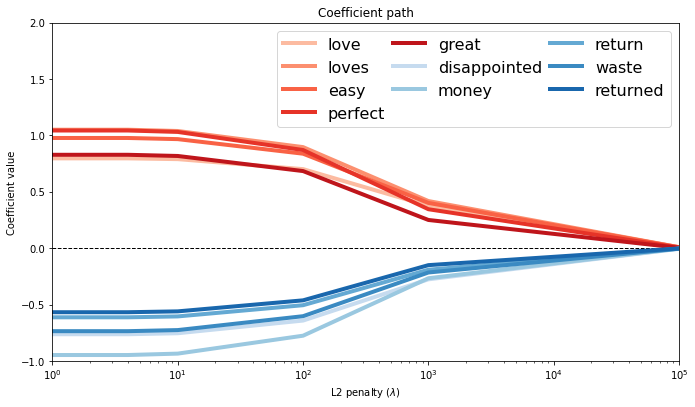

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['word'].isin(positive_words)]
    table_negative_words = table[table['word'].isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].as_matrix().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].as_matrix().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(coeff_table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

Quiz Question: (True/False) All coefficients consistently get smaller in size as L2 penalty is increased.

Answer: True

Quiz Question: (True/False) Relative order of coefficients is preserved as L2 penalty is increased. (If word 'cat' was more positive than word 'dog', then it remains to be so as L2 penalty is increased.)

Answer: False

## Measuring accuracy

Now, let us compute the accuracy of the classifier model. Recall that the accuracy is given by

accuracy=# correctly classified data points# total data points
Recall from lecture that that the class prediction is calculated using

y^i=+1 if h(xi)* w>0
y^i=-1 if h(xi)* w≤0

Note: It is important to know that the model prediction code doesn't change even with L2 penalty. The only thing that changes is that the estimated coefficients used in this prediction are different with L2 penalty.

In [ ]:
df = coeff_table.iloc[:,[1,2,3,4,5,6]]   #Remove Variable Name Column

In [124]:
def classifier_accuracy(coefficients, feature_matrix, sentiment):
    scores = np.dot(feature_matrix, coefficients)   # feature_matrix => (n, m) coefficients => (m, 1)  scores => (n,1)
    class_predict = np.array([1 if u > 0 else -1 for u in scores])    #array
    #print(sum(class_predict == 1))
    print('Accuracy is : ' + str(sum(class_predict == sentiment)/len(class_predict)))   #0.7864545218479262
    accuracy = sum(class_predict == sentiment)/len(class_predict)
    return accuracy

In [125]:
df.apply(classifier_accuracy, args =(feature_matrix_train, sentiment_train), axis = 0)

Accuracy is : 0.7851561577866434
Accuracy is : 0.7851089445480512
Accuracy is : 0.7849909114515711
Accuracy is : 0.7839758268218409
Accuracy is : 0.7758551497839994
Accuracy is : 0.6803663747314747


coefficients_0_penalty      0.785156
coefficients_4_penalty      0.785109
coefficients_10_penalty     0.784991
coefficients_1e2_penalty    0.783976
coefficients_1e3_penalty    0.775855
coefficients_1e5_penalty    0.680366
dtype: float64

In [123]:
df.apply(classifier_accuracy, args =(feature_matrix_valid, sentiment_valid), axis = 0)

training accuracy is : 0.781439641490057
training accuracy is : 0.7815330034543927
training accuracy is : 0.7817197273830642
training accuracy is : 0.781066193632714
training accuracy is : 0.7713565493417982
training accuracy is : 0.667818130893474


coefficients_0_penalty      0.781440
coefficients_4_penalty      0.781533
coefficients_10_penalty     0.781720
coefficients_1e2_penalty    0.781066
coefficients_1e3_penalty    0.771357
coefficients_1e5_penalty    0.667818
dtype: float64

Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the training data?

Answer: 0

Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the validation data?

Answer: 10

Quiz question: Does the highest accuracy on the training data imply that the model is the best one?

Answer: No